In [44]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import os
from glob import glob
from functools import reduce

In [58]:
def rcollapse(arr, sep=" "):
    try:
        sep=str(sep)
        results = reduce(lambda x,y: '{}{}{}'.format(x,sep, y), arr)
    except Exception as e:
        print(e)
        results=None
    finally:
        return(results)

In [59]:
path = 'H:/Documents/Training/Thinkful'
f = 'crime.csv'

os.chdir('H:/Documents/Training/Thinkful')

In [61]:
d = pd.read_csv('crime.csv')

In [62]:
md = pd.DataFrame()
md['org'] = d.columns
md['label'] = ['city', 'population', 'violent',
               'murder', 'rape1', 'rape2',
               'robbery', 'assault', 'property',
               'burglary', 'larceny', 'auto', 'arson']
# md

In [64]:
norm = d.copy()
norm.columns = md.label
norm.columns.name=None
norm['murder_bin'] = norm.murder>0
norm['robery_bin'] = norm.robbery>0
norm.loc[:, 'violent':'arson'] = norm.loc[:, 'population':'arson'].apply(lambda x: (x/norm.population)*100000)
norm.columns

Index(['city', 'population', 'violent', 'murder', 'rape1', 'rape2', 'robbery',
       'assault', 'property', 'burglary', 'larceny', 'auto', 'arson',
       'murder_bin', 'robery_bin'],
      dtype='object')

In [22]:
print(norm.apply(lambda x: sum(x.isna())))
print(norm.shape)

city            0
population      0
violent         0
murder          0
rape1         348
rape2           0
robbery         0
assault         0
property        0
burglary        0
larceny         0
auto            0
arson         161
murder_bin      0
robery_bin      0
dtype: int64
(348, 15)


In [71]:
from functools import reduce
drp = ['rape1']
matches = list(filter(lambda x: x in drp, norm.columns))
if len(matches)>0:
    norm.drop(matches, axis=1, inplace=True)
norm.columns

Index(['city', 'population', 'violent', 'murder', 'rape2', 'robbery',
       'assault', 'property', 'burglary', 'larceny', 'auto', 'arson',
       'murder_bin', 'robery_bin'],
      dtype='object')

#### Correlation analysis
Property crime has too high a correlation to larceny--pearson coefficient = 0.99--for me to think that it's real. They're probably going to be nearly synonymous. Burglary is also highly correlated, with a Pearson coefficient of 0.78. In addition, there are 8 pairs of highly correlated variables that do not include property. Taking out 'robbery' and 'violent crime' might cut down significantly on colinearity between variables.

In [80]:
nc = norm.drop('city', axis=1).corr()
nc.index.name='var1'
nc.columns.name='var2'
long = nc.reset_index().melt(id_vars='var1', value_name='correlation', var_name='var2')
long.loc[(long.correlation >=0.6) &
         (long.correlation < 1) &
         (long.var1>long.var2)].sort_values(['var1', 'correlation'], ascending=False)

,var1,var2,correlation
66,violent,assault,0.964336
53,violent,robbery,0.862699
92,violent,burglary,0.699370
69,robbery,assault,0.710264
30,robbery,murder,0.639665
121,robbery,auto,0.630768
110,property,larceny,0.985987
97,property,burglary,0.787320
37,murder_bin,murder,0.782663
99,larceny,burglary,0.676478


In [84]:
nc

var2,population,violent,murder,rape2,robbery,assault,property,burglary,larceny,auto,arson,murder_bin,robery_bin
var1,,,,,,,,,,,,,
population,1.000000,0.150650,0.071966,0.020140,0.179951,0.129336,0.001928,-0.006458,0.000694,0.065369,0.317241,0.162309,0.064371
violent,0.150650,1.000000,0.598396,0.593339,0.862699,0.964336,0.531994,0.699370,0.440852,0.588651,0.518020,0.493455,0.335533
murder,0.071966,0.598396,1.000000,0.292214,0.639665,0.505044,0.209125,0.331165,0.150449,0.419435,0.433240,0.782663,0.244457
rape2,0.020140,0.593339,0.292214,1.000000,0.404048,0.539163,0.449445,0.485477,0.409399,0.264857,0.387016,0.249256,0.271464
robbery,0.179951,0.862699,0.639665,0.404048,1.000000,0.710264,0.419695,0.574677,0.334094,0.630768,0.476899,0.539077,0.429749
assault,0.129336,0.964336,0.505044,0.539163,0.710264,1.000000,0.517531,0.681732,0.431420,0.513545,0.470576,0.410321,0.238974
property,0.001928,0.531994,0.209125,0.449445,0.419695,0.517531,1.000000,0.787320,0.985987,0.508681,0.432694,0.197976,0.431294
burglary,-0.006458,0.699370,0.331165,0.485477,0.574677,0.681732,0.787320,1.000000,0.676478,0.553136,0.468143,0.270480,0.330713
larceny,0.000694,0.440852,0.150449,0.409399,0.334094,0.431420,0.985987,0.676478,1.000000,0.428265,0.384023,0.155006,0.422936


#### Outlier Analysis

C:\Users\dmnb4898\miniconda3\envs\Env37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


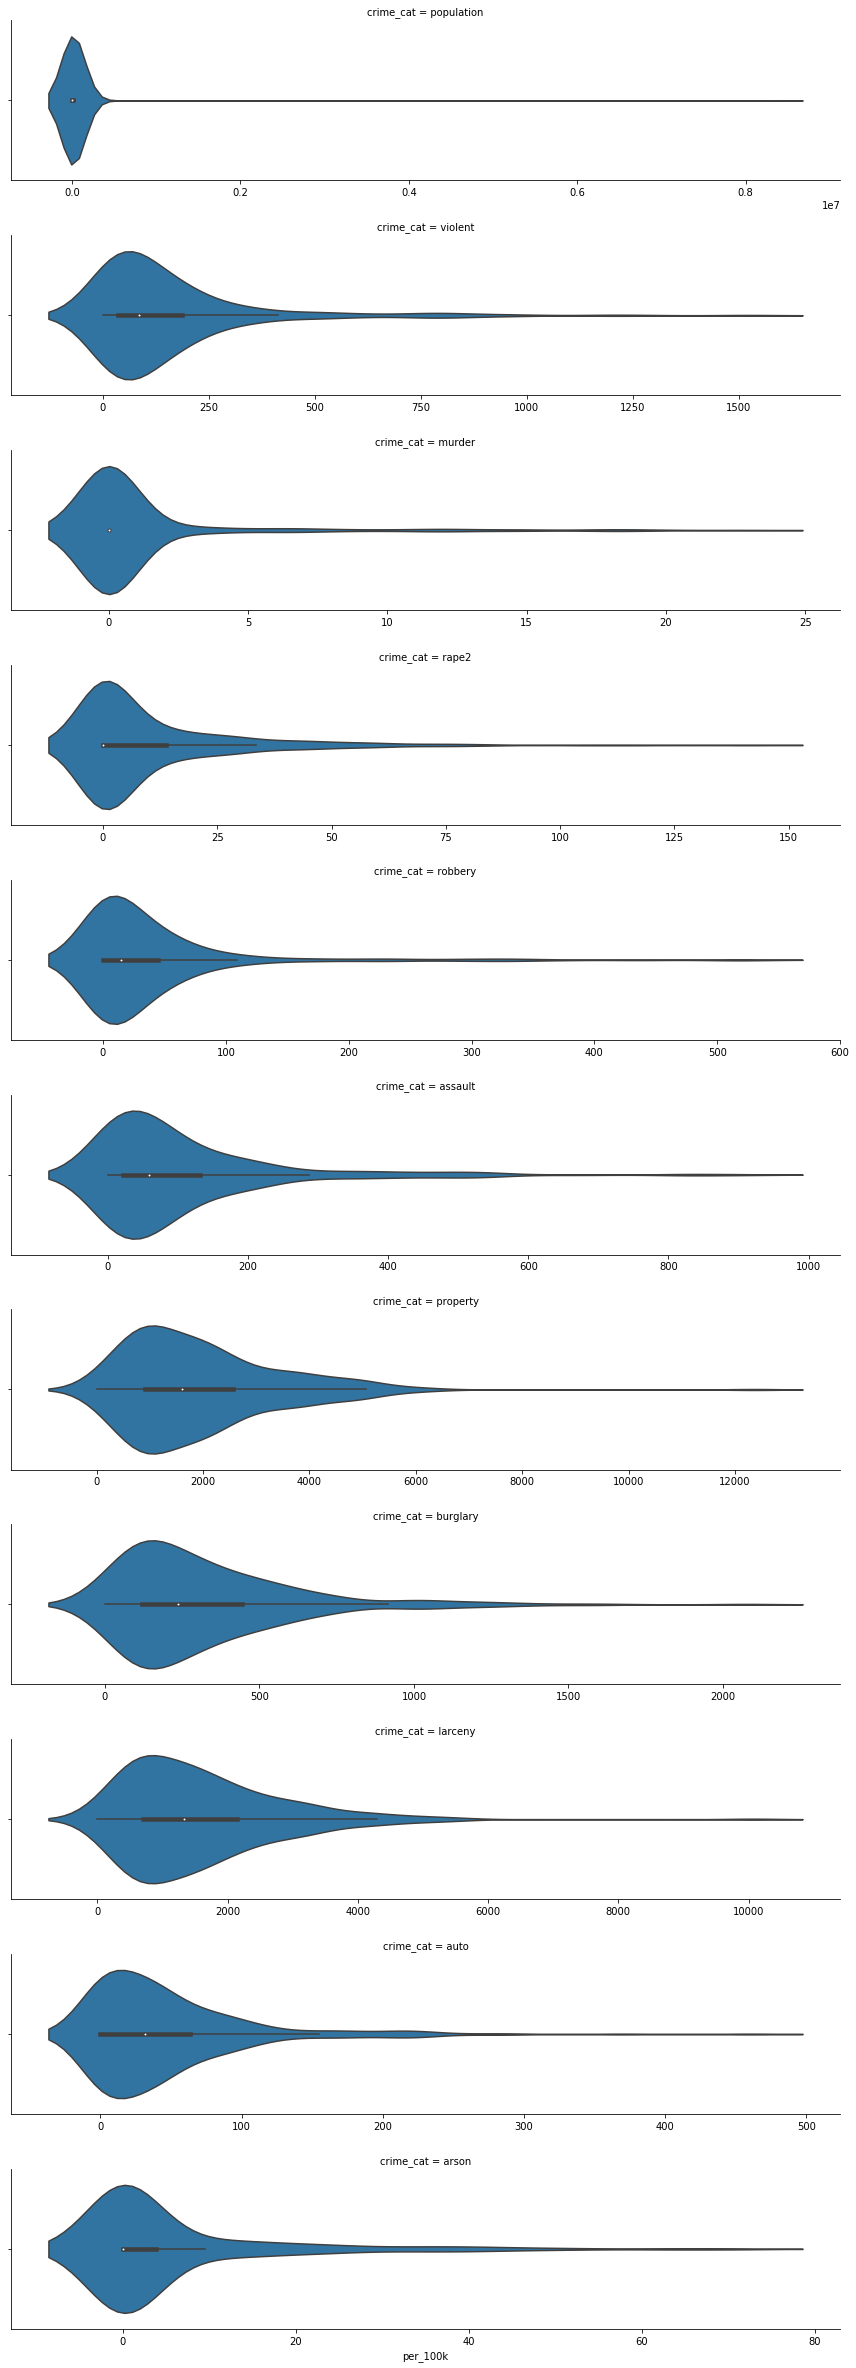

C:\Users\dmnb4898\miniconda3\envs\Env37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


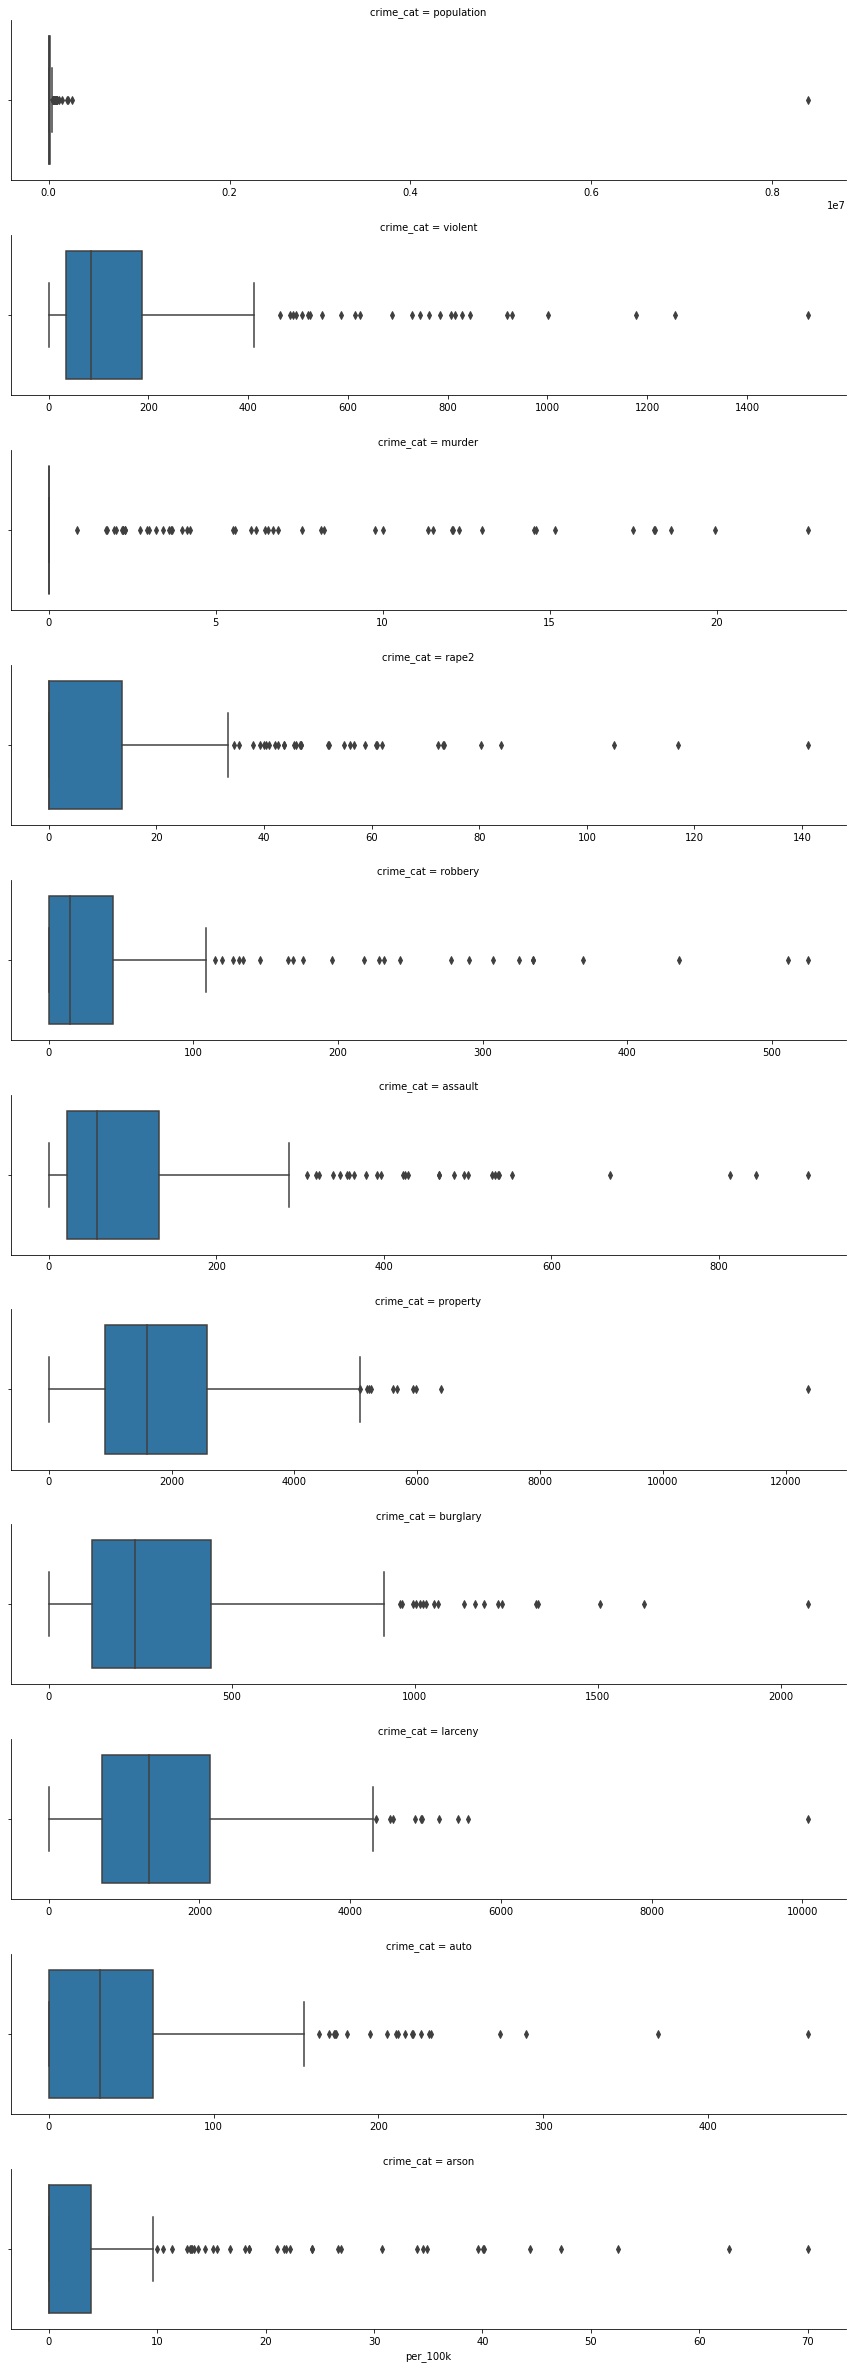

In [81]:
#  Violin plots
d_viol = norm.loc[:, 'population':'arson'].melt(var_name='crime_cat', value_name='per_100k')

g = sns.FacetGrid(d_viol, row='crime_cat', sharex=False, aspect=4)
g.map(sns.violinplot, 'per_100k')
plt.show()

g = sns.FacetGrid(d_viol, row='crime_cat', sharex=False, aspect=4)
g.map(sns.boxplot, 'per_100k')

In [83]:
outliers = {'violent': [1400, 1100],
           'rape2': [100, 70],
           'robbery': [500, 400],
           'assault': [700, 600],
           'property': [10000],
           'burglary': [2000, 1450],
           'larceny': [10000],
           'auto': [260]}

outl = pd.DataFrame({'label': [x[0] for x in outliers.items()],
              'low_outlier': [min(x[1]) for x in outliers.items()],
              'high_outlier': [max(x[1]) for x in outliers.items()]})
md = pd.merge(md, outl, left_on='label', right_on='label', how='left')

In [37]:
for r in md.loc[~(md.low_outlier.isna())].index:
    lab = md.loc[r, 'label']
    norm['{0}_outlier'.format(lab)] = norm[lab]>=md.loc[r, 'low_outlier']

In [38]:
from functools import reduce
norm.loc[norm.outlier_burglary|norm.outlier_larceny|norm.outlier_burglary,
        norm.columns.sort_values()]

label,arson,assault,assault_outlier,auto,auto_outlier,burglary,burglary_outlier,city,larceny,larceny_outlier,...,outlier_violent,population,property,property_outlier,rape2,rape2_outlier,robbery,robbery_outlier,violent,violent_outlier
199,NaN,425.402613,False,75.964752,False,1625.645700,True,Monticello Village,2491.643877,False,...,False,6582,4193.254330,False,60.771802,False,243.087208,False,729.261623,False
218,44.378101,812.926131,True,225.924880,False,1504.821076,True,Niagara Falls,3931.496349,False,...,True,49574,5662.242304,False,24.206237,False,334.852947,False,1178.036874,True
289,NaN,465.707028,False,211.685013,False,2074.513124,True,Seneca Falls Town,10076.206605,True,...,False,2362,12362.404742,True,0.000000,False,42.337003,False,508.044030,False


## Final Decisions
Dropped features:
- Larceny: corresponds perfectly with property crime
- Murder: Since we're keeping the tranformed binary variable we won't be using the continuous variable
- Robbery: Same as murder
- Violent: Strong colinearity with a number of other features, including assault and burglary--both of which I'm keeping (for now).

Outliers were also dropped as defined below.

In [87]:
md[['label', 'high_outlier']].dropna()

,label,high_outlier
2,violent,1400.0
5,rape2,100.0
6,robbery,500.0
7,assault,700.0
8,property,10000.0
9,burglary,2000.0
10,larceny,10000.0
11,auto,260.0
